# Part I - (Dataset Exploration FordGoBike)¶
## by (Tejas Santosh Kale)
### Introduction

### Preliminary Wrangling
The process of obtaining, analysing, and cleansing data for the Ford GoBike dataset is known as preliminary data wrangling. 

This document investigates a dataset including information on individual rides taken.

In 2019, a bike-sharing system encompassing the wider San Francisco Bay area will be launched.

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

importing the data from csv file i.e '201902-fordgobike-tripdata.csv'

In [52]:
# load in the dataset into a pandas dataframe, print statistics
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [53]:
# row and coloumn of the dataset
df.shape

(183412, 16)

In [54]:
# data type of the dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [55]:
# chek for duplicates
df.duplicated().sum()

0

In [56]:
# check for the percentage of missing values
missing_val_summary = (df.isnull().sum()/df.isnull().count())*100

display(missing_val_summary)

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

In [57]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Oberevation 
This is true.After running the commands df.head(), df.shape(), df.describe(),df.dtypes and df.duplicated() on the dataset, I discovered several issues.

The dataset contains 183,412 rides with 16 features ('duration_sec,'start_time,'end_time,'start_station_id,'start_station_name,'start_station_latitude,'start_station_longitude,'bike_id,'user_type,'member_birth_year,'member_gender,'bike_share_for_all_trip'). Most variables are numeric in nature, however some, such as start_time and end_time, contain incorrect data types instead of datetime.

In addition, the variables start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, and member_gender had the following percentages of missing values:

start_station_id: 0.107

start_station_name: 0.107

end_station_id: 0.107

end_station_name: 0.107

member_birth_year: 4.506

member_gender: 4.506

### Few ambiguity in the dataset's 
Among various other details that might merit inquiry as part of the data exploration, I am particularly interested in determining:

1.The most common time of day and day of the week for excursions?

2.How long does a typical trip take?

3.If the answer in 1 & 2 above depend on if a user is a subscriber or a customer?

The duration_sec, start_time, and user_type are the most important features to consider.

In [58]:
# make a copy of the original dataset to clean
df_new = df.copy()

In [59]:
# remove the unwanted coloumn from the dataset for easy Wrangling for the data
df_new.drop(['end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude', 'bike_id' 
        'bike_share_for_all_trip'], axis=1, inplace=True)

KeyError: "['bike_idbike_share_for_all_trip'] not found in axis"

In [60]:
# print the new data set
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [61]:
# assign proper data types to the start_time
df_new['start_time'] = pd.to_datetime(df_new['start_time'])

In [62]:
# extract day of the week
df_new['day_of_week'] = pd.DatetimeIndex(df_new['start_time']).strftime('%A')
# extract the time of the day
df_new['start_hour'] = df_new['start_time'].apply(lambda time: time.hour)
df_new['time_of_day'] = 'Morning'
df_new['time_of_day'][(df_new['start_hour'] >= 12) & (df_new['start_hour'] <= 17)] = 'Afternoon'
df_new['time_of_day'][(df_new['start_hour'] >= 18) & (df_new['start_hour'] <= 23)] = 'Night'

# display the added columns
display(df_new[['day_of_week','start_hour','time_of_day']])

,day_of_week,start_hour,time_of_day
0,Thursday,17,Afternoon
1,Thursday,18,Night
2,Thursday,12,Afternoon
3,Thursday,17,Afternoon
4,Thursday,23,Night
...,...,...,...
183407,Friday,0,Morning
183408,Friday,0,Morning
183409,Friday,0,Morning
183410,Friday,0,Morning


In [63]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,Night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Night


## Univariate Exploration
The process of examining and visualising individual variables or characteristics in a dataset one at a time, also known as univariate analysis, is an important stage in data analysis. Univariate exploration's major purpose is to understand the distribution, central tendency, dispersion, and other features of each variable independently. It aids in identifying anomalies, trends, and insights in data.



I will create a scatter plot for the duration_sec visulization.

In [64]:
def plot_label(x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

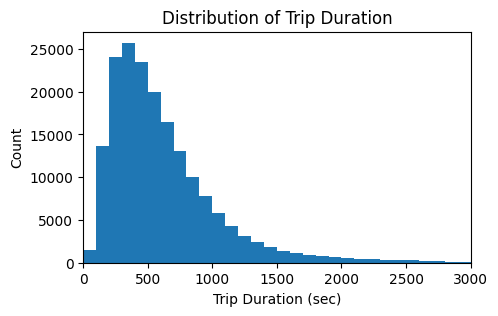

In [65]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, df_new['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[5, 3])
plt.hist(data = df_new, x = 'duration_sec', bins=bins)
plt.xlim(0, 3000)
plot_label("Trip Duration (sec)","Count","Distribution of Trip Duration")
plt.show()

Note:- Because the right visualisation for the duration_sec is not evident from the preceding data, I will convert the duration_sec to the minute duration.

In [66]:
# standardizing the trip duration variable into minutes
df_new['duration_min'] = df_new['duration_sec'] / 60
# drop the 'duration_sec" column
df_new.drop('duration_sec' , axis = 1 , inplace = True)

# show
df_new[['duration_min']]

,duration_min
0,869.750000
1,708.683333
2,1030.900000
3,608.166667
4,26.416667
...,...
183407,8.000000
183408,5.216667
183409,2.350000
183410,2.316667


The time duration of average trip taken is 12.1 minutes.


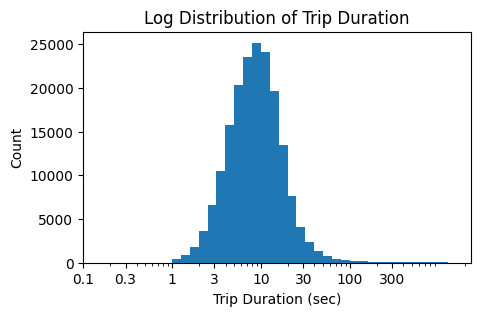

In [67]:
# print the average trip duration
average_trip_duration = np.round(df_new['duration_min'].mean(),2)
print("The time duration of average trip taken is %s minutes."%(average_trip_duration))

# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_new['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[5, 3])
plt.hist(data = df_new, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plot_label("Trip Duration (sec)","Count","Log Distribution of Trip Duration")
plt.show()

When the journey duration is converted to minutes and shown on a log-scale, the distribution appears to be strongly unimodal, with a peak about 10 minutes. Surprisingly, the typical travel lasts just 12 minutes.

Making bar graphs with day_of_week and counts.

day_of_week
Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: count, dtype: int64

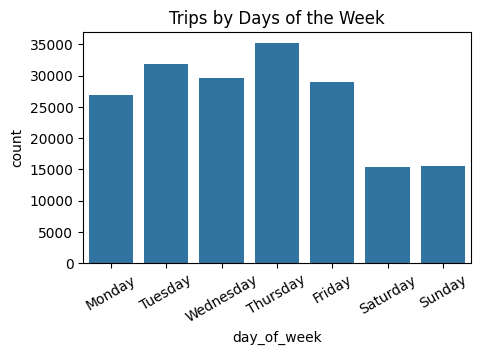

In [33]:


# Get the count of trips made in each day of the week
display(df_new['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plot distribution of day of week
plt.figure(figsize=[5, 3])

# base_color = sns.color_palette()[0]
sns.countplot(data = df_new, x = 'day_of_week', order=weekday,color = sns.color_palette()[0])
plt.title('Trips by Days of the Week')
plt.xticks(rotation=30)
plt.show()

According to the graph above, Thursday and Tuesday had the highest number of counts, while Saturday and Sunday had the lowest, maybe due to the hodiay on Saturday and Sunday.

The percentage count of trips made in terms of times of the day(%)
time_of_day
Afternoon    38.51
Morning      38.42
Night        23.07
Name: count, dtype: float64


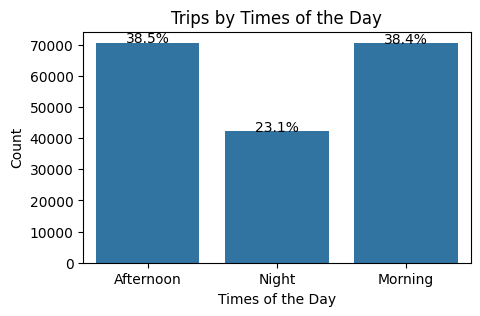

In [68]:
# Get the percentage count of trips made in terms of times of the day
time_of_day_count = (df_new['time_of_day'].value_counts()/df_new['time_of_day'].count())*100
print("The percentage count of trips made in terms of times of the day(%)")
print(time_of_day_count.round(2).sort_values(ascending=False))

# plot distribution of day of week
plt.figure(figsize=[5, 3])
base_color = sns.color_palette()[0]
sns.countplot(data = df_new, x = 'time_of_day', color = base_color)
n_points = df_new.shape[0]
user_counts = df_new['time_of_day'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')
plot_label("Times of the Day","Count","Trips by Times of the Day")

plt.show()

The figure shows that the most travels occur during the afternoon (12:00 - 17:59 hours of the day), followed by the morning (00:00 - 11:59 hours of the day). However, the difference in the number of trips taken between the two dates is negligible.This is entirely logical. Nobody expects so many rides at night. More research will be conducted to determine whether this is likely influenced by user types (subscriber and customer).

User Types Percentage Count (%)


user_type
Subscriber    89.17
Customer      10.83
Name: count, dtype: float64


Member Gender Percentage Count (%)


member_gender
Male      74.60
Female    23.32
Other      2.09
Name: count, dtype: float64

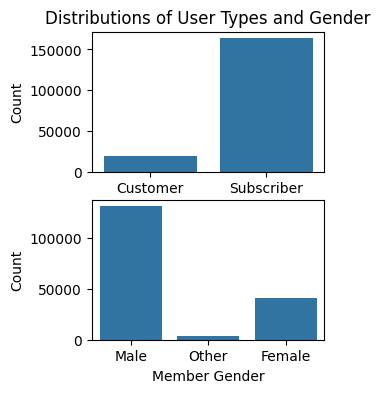

In [35]:
# Get the percentage count of user types and gender
user_type_count = (df_new['user_type'].value_counts()/df_new['user_type'].count())*100
member_gender_count = (df_new['member_gender'].value_counts()/df_new['member_gender'].count())*100

print("User Types Percentage Count (%)")
display(user_type_count.round(2).sort_values(ascending=False))
print("\nMember Gender Percentage Count (%)")
display(member_gender_count.round(2).sort_values(ascending=False))

# Attributes of the Riders: the distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [3,4])
default_color = sns.color_palette()[1]
sns.countplot(data = df_new, x = 'user_type', color = sns.color_palette()[0], ax = ax[0])
sns.countplot(data = df_new, x = 'member_gender', color = sns.color_palette()[0], ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Distributions of User Types and Gender');

Most journeys (approximately 90%) are taken by subscribers, with the remaining 10% being casual riders, as would be expected in most circumstances. With a higher percentage of trips taken by subscribers, who wouldn't want to make the most of their subscription? Alternatively, subscribers may use the bikes for daily commuting while customers just use them for recreational activities.

Furthermore, nearly 75% of the riders who have taken excursions are males, which is roughly three times that of females, with the remaining 2% classified as other.


The percentage count of trip starting hours (%)
start_hour
17    11.92
8     11.48
18     9.17
9      8.67
16     7.73
7      5.79
19     5.39
15     5.00
12     4.76
13     4.66
10     4.56
14     4.44
11     4.30
20     3.53
21     2.49
6      1.90
22     1.59
23     0.90
0      0.50
5      0.49
1      0.30
2      0.21
4      0.13
3      0.09
Name: count, dtype: float64


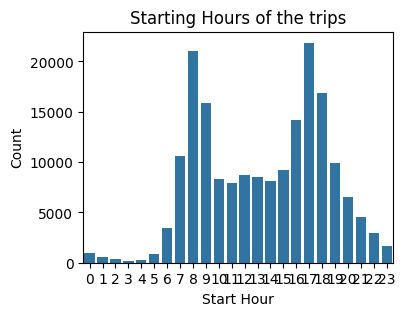

In [69]:
# Get the percentage count of trips made in terms of times of the day
start_hour_count = (df_new['start_hour'].value_counts()/df_new['start_hour'].count())*100
print("The percentage count of trip starting hours (%)")
print(start_hour_count.round(2).sort_values(ascending=False))

# plot distribution of day of week
plt.figure(figsize=[4, 3])
base_color = sns.color_palette()[0]
sns.countplot(data = df_new, x = 'start_hour', color = base_color)
plot_label("Start Hour","Count","Starting Hours of the trips")

plt.show()

The accompanying barchart shows that most journeys begin between 8-9 a.m. and 5-6 p.m. (17-18). This is quite justifiable because these hours correlate to when people leave for work and home.

In [71]:
# create the age column taking the year 2019 as the current year
df_new['user_age'] = df_new['member_birth_year'].apply(lambda x: 2019 - x)
# drop the 'member_birth_year" column
df_new.drop('member_birth_year' , axis = 1 , inplace = True)
# test
df_new[['user_age']].head()

,user_age
0,35.0
1,NaN
2,47.0
3,30.0
4,45.0


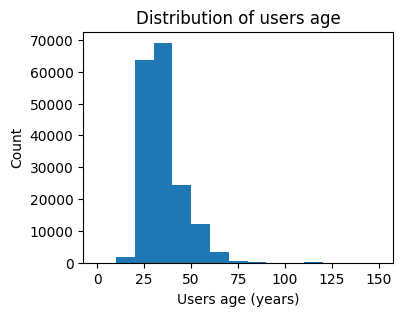

In [72]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, df_new['user_age'].max()+binsize, binsize)

plt.figure(figsize=[4, 3])
plt.hist(data = df_new, x = 'user_age', bins=bins)
plot_label("Users age (years)","Count","Distribution of users age")
plt.show()

From the above figure maximum age from the data set is from 30-40 age 

## Conclusion for the Univariate Exploration

When the right visualisation for the data is not obvious, converting the duration_sec variable to a minute-based length is a reasonable method. This adjustment can make the data more interpretable and may uncover patterns or insights that were previously hidden when working with seconds.

You can gain various advantages by changing the duration to minutes:

Interpretability: Humans frequently understand durations in minutes more intuitively than durations in seconds, especially when dealing with greater amounts.

Smoothing Data: Converting to minutes can help smooth the distribution of data, making it easier to discern trends and patterns.

Converting duration_sec to minutes can help preserve consistency in your analysis if other time-related variables in your dataset are already in minutes or hours.


For the age transformation, because the ostensibly outliers in the age distribution are discovered to be legitimate years. I was able to bin/group the ages, resulting in a less skew distribution.


I also examined variables such as user_type, member_genders, and a plethora of other derived variables that are essential for comprehending the dataset and communicating the data findings. My general findings are summarised below:



Thursday is the busiest day of the week, followed by Tuesday and Wednesday. In comparison to weekends, most individuals ride throughout the weekdays from Monday to Friday.

Because the seemingly outliers in the age distribution are determined to be authentic years for the age transformation. I was able to categorise and group the ages, resulting in a less skewed distribution.


I also looked at variables like user_type, member_genders, and a slew of other derived variables that are critical for understanding the dataset and communicating the results. My general conclusions are as follows:



The busiest day of the week is Thursday, followed by Tuesday and Wednesday. In opposed to weekends, most people ride during the week, from Monday to Friday.

## Bivariate Exploration

Defining the numeric_vars = ['start_hour', 'duration_min', 'user_age' ] and categoric_vars = ['user_type', 'member_gender', 'day_of_week', 'time_of_day']

In [39]:
numeric_vars = ['start_hour', 'duration_min', 'user_age' ]
categoric_vars = ['user_type', 'member_gender', 'day_of_week', 'time_of_day']

Finding the relation between numeric_vars = ['start_hour', 'duration_min', 'user_age' ] by using scatter plots and heat map

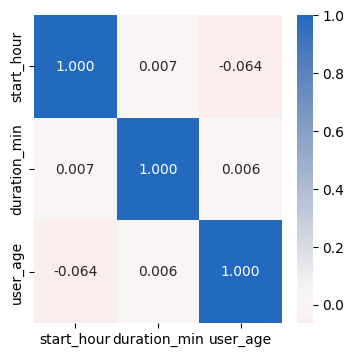

In [40]:
# correlation plot
plt.figure(figsize = [4, 4])
sns.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The data from this heat map is not clear so i create the scatter plots of this heat map below

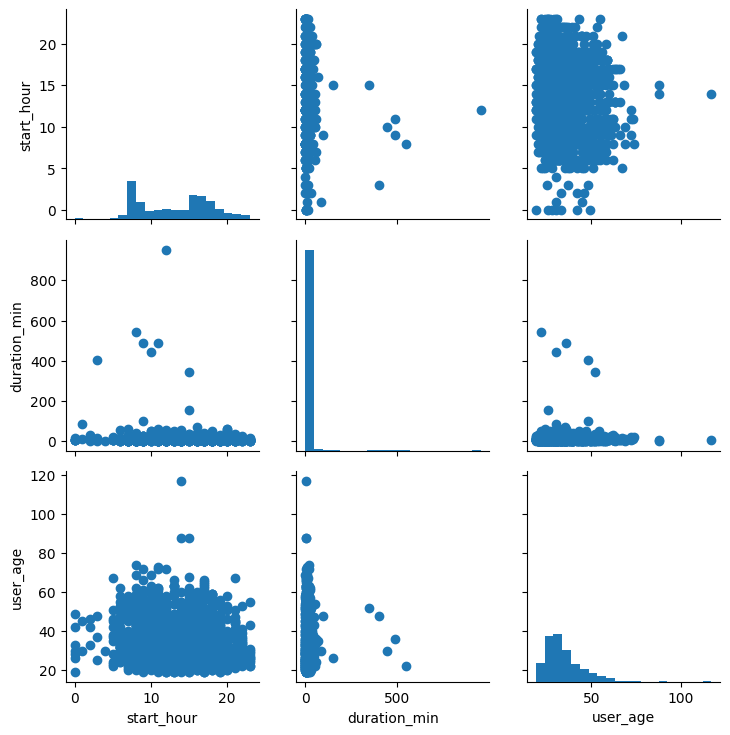

In [41]:
# plot matrix: sample 1834 trips so that plots are clearer and
# they render faster
samples = np.random.choice(df_new.shape[0], 1834, replace = False)
df_new_samp = df_new.loc[samples,:]

g = sns.PairGrid(data = df_new_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

The plots show that'start_hour,' 'duration_min,' and 'user_age' are not associated with one another. However, a modest inverse relationship was discovered between user age and trip duration. I would look at whether the age groupings (binned age) have any relationship with the trip duration.

Box plot using random variables from the dataset to analysis the user types and their duration of use

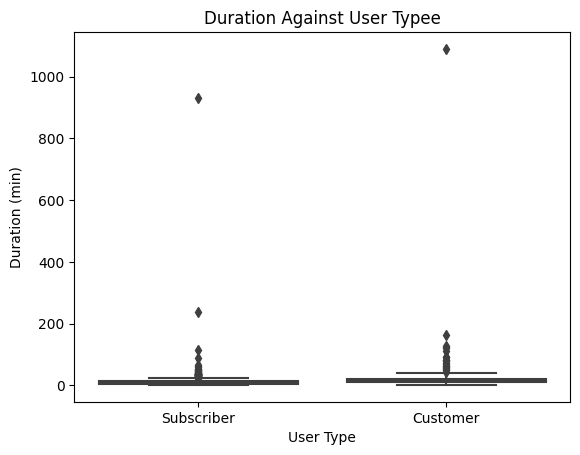

In [73]:
# plot relationship between user type and duration
samples = np.random.choice(df_new.shape[0], 1834, replace = False)
df_new_samp = df_new.loc[samples,:]
base_color = sns.color_palette()[0]
sns.boxplot(data=df_new_samp, x='user_type', y='duration_min', color=base_color)
plot_label("User Type","Duration (min)","Duration Against User Typee")


From the box graph we had get the idea of the subsciber and customer median duration time

Conclusion for the Bivariate Exploration:-
                                          The conclusion for a bivariate exploration typically summarizes the key findings, patterns, and insights obtained from the analysis of relationships and interactions between two variables in a dataset. 

## Multivariate Exploration

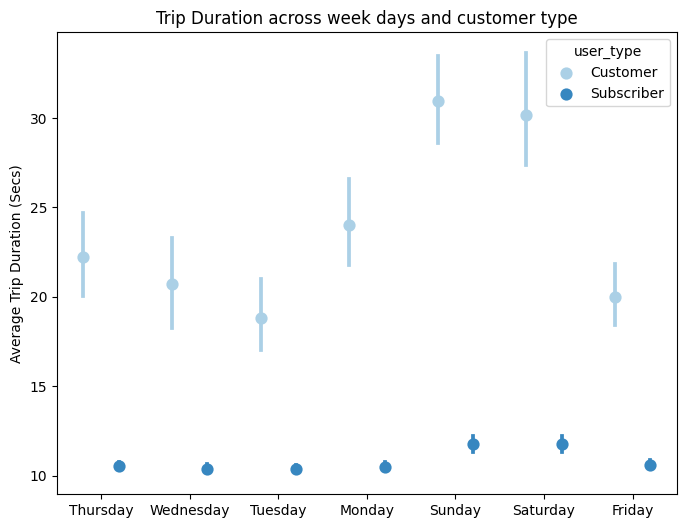

In [75]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_new, x ='day_of_week', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plot_label("","Average Trip Duration (Secs)","Trip Duration across week days and customer type")
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

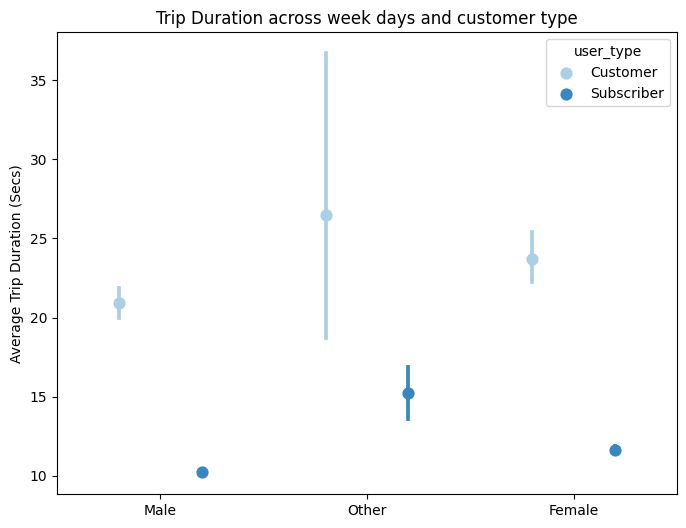

In [76]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_new, x ='member_gender', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plot_label("","Average Trip Duration (Secs)","Trip Duration across week days and customer type")

# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

For both subscribers and customers, the other gender group spent most duration followed by female and then malw



Daily average trip duration for each user_type

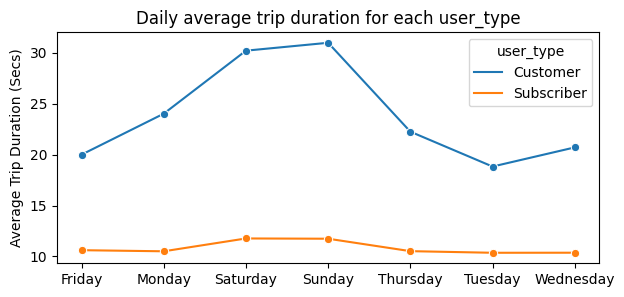

In [77]:
user_weekday_avg_min = df_new.groupby(['user_type','day_of_week']).duration_min.mean()
user_weekday_avg_min = user_weekday_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[7,3])
sns.lineplot(data = user_weekday_avg_min, x='day_of_week', y='duration_min', hue='user_type', marker='o')
plot_label("","Average Trip Duration (Secs)","Daily average trip duration for each user_type")



Every day of the week, customers' rides lasted longer than subscribers' rides.

Average travel duration by time of day for each user_type

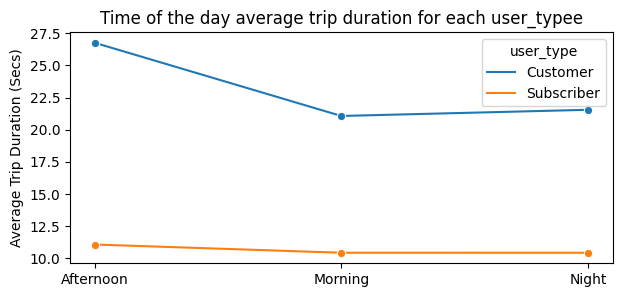

In [78]:
user_daytime_avg_min = df_new.groupby(['user_type','time_of_day']).duration_min.mean()
user_daytime_avg_min = user_daytime_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[7,3])
sns.lineplot(data = user_daytime_avg_min, x='time_of_day', y='duration_min', hue='user_type', marker='o')
plot_label("","Average Trip Duration (Secs)","Time of the day average trip duration for each user_typee")


## Conclusion:-
The dataset is just for the months of February and March 2019

The average duration for all trips is about 500 seconds

Most trips were taken on Thursdays and Tuesdays

Weekends have the least trip records

The rush hours; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

About 90% of the trips were taken by subscribers

Less than 10% of the trips were bike sharing for all trips

Most of the trips were taken by males (>70%)

Customers spend more duration than subscribers

Females spend more duration than males

Trip durations on weekends are longer than on other weekdays

Only subscribers are allowed to share bikes on trips

Customer type doesn't really affect the number of trips per weekday

Customers travel for longer durations regardless of the day of the week as compared to subscribers.

It can be seen that the plots remained slightly consistent trip durations for both the morning and night time for the two user types groups, however the average journey for consumers in the afternoon increased dramatically. This is because most consumers begin their journey in the afternoon.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I extended my investigation of the dependency of the user_type on the average trip duration, days of the week and the time of the day in this section by looking at the relationship between the features. The multivariate exploration here showed that there indeed is a dependency of the average trip duration on if a user is a subscriber or a customer. On average, customers rides lasted longer than subscribers rides on every day of the week and time of the day.

In [79]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_I_exploration_Gobike.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_Gobike.ipynb to html
[NbConvertApp] Writing 1218853 bytes to Part_I_exploration_Gobike.html
